                                    CLIMATE ANALYSIS HAWAII

We found that there are 9 stations in the dataset. The busiest Station was USC00519281 with 2772 weather observations. The lowest, highest temerature recorded at this station, with the average of 71.7, the lowest of 54.0 and highest of 85.0

We broke down precipitation analysis into seasons: winter, spring, summer and fall. The most rains turned out to be in the fall. With 3,8 inchecs of rain on average with the highest of 6 inches. Less rain in the summer time with the highest of 4 inches at the end of July. The rainy period last only few days at that time. Which is why I picked August 17th throuhg 23rd for a vacation. Average temperature at that time is 79.0.


My analysis consist of 5 parts:

~ Exploration of the Data, Reflecting Tables into SQLAlchemy ORM
~ Cilmate, Date & Precipitation analysis
~ Precipitation in deifferent seasons                             
~ Station & Temperature Analysis
~ Challenge - currently in progress

In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
from datetime import datetime

                                                PART I
                                                
                                        EXPLORATION OF THE DATA 
                                        
                                Reflecting Tables into SQLAlchemy ORM

In [2]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [3]:
# create an engine
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [4]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [5]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [6]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [7]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [8]:
# Create the inspector and connect it to the engine
inspector = inspect(engine)

# inspecting the columns
columns = inspector.get_columns('measurement')   
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [9]:
# inspecting the rows Measurement Table 
engine.execute('select * from measurement LIMIT 5').fetchall()  

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

                                             PART II
                                             
                              Climate, Date & Precipitation Analysis       
                                      

In [10]:
# Calculate the date 1 year ago from the last data point in the database
year_ago = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(year_ago)

('2017-08-23',)


In [11]:
# Perform a query to retrieve the data and precipitation scores
prcp = session.query(Measurement.prcp, Measurement.date).\
                filter(Measurement.date.between('2016-08-23', '2017-08-23')).\
                order_by().\
                all()
print(prcp)

[(0.0, '2016-08-23'), (0.08, '2016-08-24'), (0.08, '2016-08-25'), (0.0, '2016-08-26'), (0.0, '2016-08-27'), (0.01, '2016-08-28'), (0.0, '2016-08-29'), (0.0, '2016-08-30'), (0.13, '2016-08-31'), (0.0, '2016-09-01'), (0.0, '2016-09-02'), (0.0, '2016-09-03'), (0.03, '2016-09-04'), (None, '2016-09-05'), (None, '2016-09-06'), (0.05, '2016-09-07'), (0.0, '2016-09-08'), (0.03, '2016-09-09'), (0.0, '2016-09-10'), (0.05, '2016-09-11'), (0.0, '2016-09-12'), (0.02, '2016-09-13'), (1.32, '2016-09-14'), (0.42, '2016-09-15'), (0.06, '2016-09-16'), (0.05, '2016-09-17'), (0.0, '2016-09-18'), (0.0, '2016-09-19'), (0.0, '2016-09-20'), (0.0, '2016-09-21'), (0.02, '2016-09-22'), (0.0, '2016-09-23'), (0.0, '2016-09-24'), (0.0, '2016-09-25'), (0.06, '2016-09-26'), (0.02, '2016-09-27'), (0.0, '2016-09-28'), (0.0, '2016-09-29'), (0.0, '2016-09-30'), (0.0, '2016-10-01'), (0.0, '2016-10-02'), (0.0, '2016-10-03'), (0.0, '2016-10-04'), (0.0, '2016-10-05'), (0.0, '2016-10-06'), (0.0, '2016-10-07'), (0.0, '2016-10-

In [12]:
# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(prcp)
prcp_df.head(2)

,prcp,date
0,0.00,2016-08-23
1,0.08,2016-08-24


In [13]:
# Setting an index to 'date' column
new_prcp_df = prcp_df.set_index('date')
new_prcp_df.head(2)

,prcp
date,
2016-08-23,0.00
2016-08-24,0.08


In [14]:
# Sort the dataframe by date
org_prcp_df = new_prcp_df.sort_values(by='date')
org_prcp_df.head(2)

,prcp
date,
2016-08-23,0.0
2016-08-23,NaN


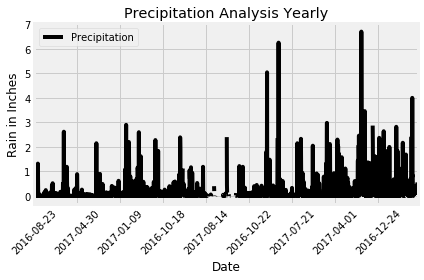

In [15]:
# plot the dataframe
prcp_df.plot('date', 'prcp', color = "black")
plt.xlabel("Date")
plt.ylabel("Rain in Inches")
plt.title("Precipitation Analysis Yearly")
plt.legend(["Precipitation"])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

                                               PART III
                                                   
                                  Precipitation in Different Seasons

In [16]:
# filter only winter days
winter_df = org_prcp_df.loc["2016-12-01": "2017-03-01"]
# print(winter_df)

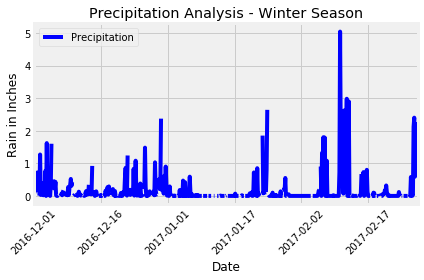

In [20]:
# Plot winter season prcp
winter_df.plot(x_compat = True, c = "blue")
plt.xlabel("Date")
plt.ylabel("Rain in Inches")
plt.title("Precipitation Analysis - Winter Season")
plt.legend(["Precipitation"])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [21]:
# filter only spring dates
spring_df = org_prcp_df.loc["2017-03-2017": "2017-06-01"]

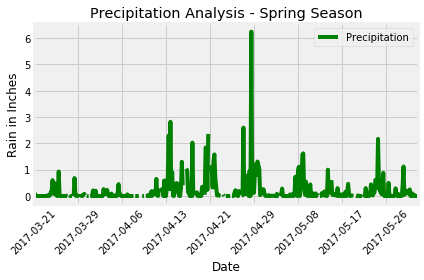

In [22]:
# Plot spring season prcp
spring_df.plot(x_compat = True, c = "green")
plt.xlabel("Date")
plt.ylabel("Rain in Inches")
plt.title("Precipitation Analysis - Spring Season")
plt.legend(["Precipitation"])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [23]:
# filter only summer dates
summer_df = org_prcp_df.loc["2017-06-01": "2017-09-01"]

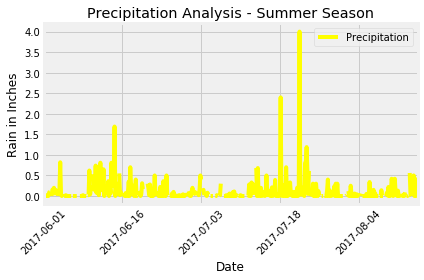

In [26]:
# Plot summer season prcp
summer_df.plot(x_compat = True, c = "yellow")
plt.xlabel("Date")
plt.ylabel("Rain in Inches")
plt.title("Precipitation Analysis - Summer Season")
plt.legend(["Precipitation"])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [31]:
# filter only fall dates
summer_df = org_prcp_df.loc["2016-09-2017": "2017-09-01"]

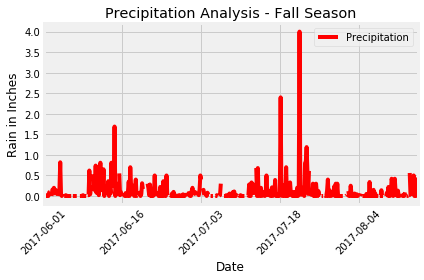

In [27]:
# Plot fall season prcp
summer_df.plot(x_compat = True, c = "red")
plt.xlabel("Date")
plt.ylabel("Rain in Inches")
plt.title("Precipitation Analysis - Fall Season")
plt.legend(["Precipitation"])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

                                            PART IV
                                  
                                 Station & Temperature Analysis
                                          

In [28]:
# Use Pandas to calculate the summary statistics for the precipitation data
org_prcp_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [29]:
# Inspecting the columns in 'station' table
inspector = inspect(engine)
columns = inspector.get_columns('station')   
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [30]:
# Inspecting the rows in 'station' table
engine.execute('select * from station').fetchall()  

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [31]:
# Design a query to show how many stations are available in this dataset?
session.query(func.count(Station.station)).all()

[(9)]

In [32]:
# What are the most active stations? Listing the stations and the counts in descending order.
# We have to join two tables on "station"
session.query(Station.station, func.count(Measurement.date)).\
    filter(Measurement.station == Station.station).\
    group_by(Station.station).\
    order_by(func.count(Measurement.date).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [33]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(Station.station, func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
             filter(Measurement.station == Station.station).\
             filter(Station.station == 'USC00519281').\
             all()

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

In [34]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station 
for_df = session.query(Station.station, Measurement.date, Measurement.tobs, ).\
    filter(Measurement.station == Station.station).\
    filter(Station.station == 'USC00519281').\
    filter(Measurement.date.between('2016-08-23', '2017-08-23')).\
    order_by(Measurement.date).\
    all()
print(for_df)

[('USC00519281', '2016-08-23', 77.0), ('USC00519281', '2016-08-24', 77.0), ('USC00519281', '2016-08-25', 80.0), ('USC00519281', '2016-08-26', 80.0), ('USC00519281', '2016-08-27', 75.0), ('USC00519281', '2016-08-28', 73.0), ('USC00519281', '2016-08-29', 78.0), ('USC00519281', '2016-08-30', 77.0), ('USC00519281', '2016-08-31', 78.0), ('USC00519281', '2016-09-01', 80.0), ('USC00519281', '2016-09-02', 80.0), ('USC00519281', '2016-09-03', 78.0), ('USC00519281', '2016-09-04', 78.0), ('USC00519281', '2016-09-05', 78.0), ('USC00519281', '2016-09-06', 73.0), ('USC00519281', '2016-09-07', 74.0), ('USC00519281', '2016-09-08', 80.0), ('USC00519281', '2016-09-09', 79.0), ('USC00519281', '2016-09-10', 77.0), ('USC00519281', '2016-09-11', 80.0), ('USC00519281', '2016-09-12', 76.0), ('USC00519281', '2016-09-13', 79.0), ('USC00519281', '2016-09-14', 75.0), ('USC00519281', '2016-09-15', 79.0), ('USC00519281', '2016-09-16', 78.0), ('USC00519281', '2016-09-17', 79.0), ('USC00519281', '2016-09-18', 78.0), 

In [35]:
results = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date >= "2016-08-23").\
filter(Measurement.date <= "2017-08-23").all()
tobs_dict = {date: temp for date, temp in results}
tobs_dict

{'2016-08-23': 74.0,
 '2016-08-24': 74.0,
 '2016-08-25': 77.0,
 '2016-08-26': 80.0,
 '2016-08-27': 74.0,
 '2016-08-28': 71.0,
 '2016-08-29': 78.0,
 '2016-08-30': 75.0,
 '2016-08-31': 76.0,
 '2016-09-01': 77.0,
 '2016-09-02': 75.0,
 '2016-09-03': 75.0,
 '2016-09-04': 73.0,
 '2016-09-05': 76.0,
 '2016-09-06': 73.0,
 '2016-09-07': 74.0,
 '2016-09-08': 74.0,
 '2016-09-09': 75.0,
 '2016-09-10': 75.0,
 '2016-09-11': 71.0,
 '2016-09-12': 72.0,
 '2016-09-13': 75.0,
 '2016-09-14': 73.0,
 '2016-09-15': 73.0,
 '2016-09-16': 73.0,
 '2016-09-17': 76.0,
 '2016-09-18': 75.0,
 '2016-09-19': 70.0,
 '2016-09-20': 70.0,
 '2016-09-21': 73.0,
 '2016-09-22': 73.0,
 '2016-09-23': 73.0,
 '2016-09-24': 77.0,
 '2016-09-25': 76.0,
 '2016-09-26': 74.0,
 '2016-09-27': 74.0,
 '2016-09-28': 77.0,
 '2016-09-29': 77.0,
 '2016-09-30': 73.0,
 '2016-10-01': 74.0,
 '2016-10-02': 73.0,
 '2016-10-03': 76.0,
 '2016-10-04': 74.0,
 '2016-10-05': 75.0,
 '2016-10-06': 75.0,
 '2016-10-07': 73.0,
 '2016-10-08': 74.0,
 '2016-10-09'

In [36]:
# Convert the data into a dataframe
station_df = pd.DataFrame(for_df, columns=['Station', 'Date', 'Temps'])
station_df.head(2)

,Station,Date,Temps
0,USC00519281,2016-08-23,77.0
1,USC00519281,2016-08-24,77.0


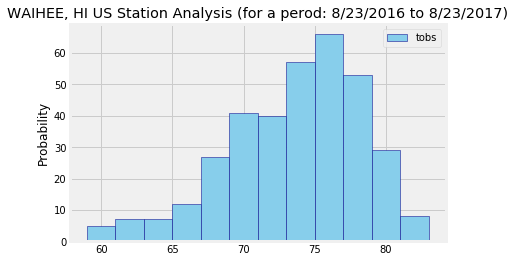

In [39]:
# Plot the results as a histogram
hist = station_df.hist(bins=12, color = "skyblue", ec="darkblue")
plt.ylabel('Probability');
plt.title('WAIHEE, HI US Station Analysis (for a perod: 8/23/2016 to 8/23/2017)')
plt.grid(True)
label = ["tobs"]
plt.legend(label)

In [40]:
# Creating a function that will calculate min, avg, max for a specific date. String in a format "Y-m-d" will be 
# passed as arg 1 (start date) and string in the same format for argument 2
def calc_temps(start_date, end_date):
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

print(calc_temps('2017-08-17', '2017-08-25'))

[(71.0, 79.0, 85.0)]


In [41]:
# assigning a new variable for average temperature
temp_avg = calc_temps('2017-08-17', '2017-08-25')
print(temp_avg)

[(71.0, 79.0, 85.0)]


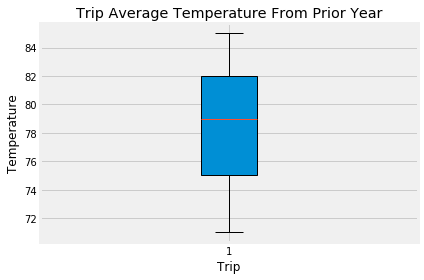

In [42]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

fig, ax = plt.subplots()
x = range(len(temp_avg))
ax.boxplot(temp_avg, patch_artist=True)
ax.set_title('Trip Average Temperature From Prior Year')
ax.set_ylabel("Temperature")
ax.set_xlabel("Trip")
fig.tight_layout()
plt.show()

In [43]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching 
# dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

data = session.query(Measurement.date, Station.station, Station.latitude, Station.longitude,\
             Station.elevation, func.sum(Measurement.prcp)).\
           filter(Measurement.station == Station.station).\
           filter(Measurement.date.between('2016-08-23', '2017-08-23')).\
           group_by(Station.station).\
           order_by(func.sum(Measurement.prcp)).\
           all() 
print(data)

[('2016-08-23', 'USC00517948', 21.3934, -157.9751, 11.9, 4.59), ('2016-08-23', 'USC00519397', 21.2716, -157.8168, 3.0, 16.089999999999986), ('2016-08-23', 'USC00514830', 21.5213, -157.8374, 7.0, 33.239999999999995), ('2016-08-23', 'USC00519523', 21.33556, -157.71139, 19.5, 38.01), ('2016-08-23', 'USC00513117', 21.4234, -157.8015, 14.6, 48.510000000000026), ('2016-08-23', 'USC00519281', 21.45167, -157.84888999999998, 32.9, 70.03000000000003), ('2016-08-23', 'USC00516128', 21.3331, -157.8025, 152.4, 147.81000000000006)]


In [44]:
# Converting to DataFrame for better understanding of the results
data_df = pd.DataFrame(data, columns=['Date', 'Station', 'Lat', 'Lng', "Elev", 'Total'])
data_df.head(2)

,Date,Station,Lat,Lng,Elev,Total
0,2016-08-23,USC00517948,21.3934,-157.9751,11.9,4.59
1,2016-08-23,USC00519397,21.2716,-157.8168,3.0,16.09


                                               PART V
                                         
                                         Challenge Assignment 
                                  
                                 Average Temps for the Days of the Trip

In [45]:
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ Challenge accepted, work in progress ~~~~~~~~~~~~~~~~~~~~~~~~~

# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()

# test my birthday date :/
daily_normals("03-16") 

[(60.0, 69.70370370370371, 78.0)]

In [48]:
#create empty list to store the values
normals = []
date_list=[]

# define the start and end dates for the trip 
trip_start_date = '2016-08-17'
trip_end_date = '2016-08-23'

# create a range of days
dates_between = session.query(Measurement.date).\
    filter(Measurement.date.between(trip_start_date, trip_end_date)).\
    all()
# print(dates_between)

#strip off the year and save a list of %m-%d strings
for date in dates_between:
   date_list.append(dt.datetime.strptime(date[0],'%Y-%m-%d').strftime('%m-%d'))     

print(date_list)

['08-17', '08-18', '08-19', '08-20', '08-21', '08-22', '08-23', '08-17', '08-18', '08-19', '08-20', '08-21', '08-22', '08-23', '08-17', '08-18', '08-19', '08-20', '08-22', '08-23', '08-17', '08-18', '08-22', '08-23', '08-17', '08-18', '08-19', '08-20', '08-21', '08-22', '08-23', '08-17', '08-18', '08-19', '08-20', '08-21', '08-22', '08-23', '08-17', '08-18', '08-19', '08-20', '08-21', '08-22', '08-23']


In [49]:
# loop through the dates to get the normal
for date in date_list:
    norms = (daily_normals(date))
    normals.extend(norms)
normals

[(69.0, 76.125, 83.0),
 (70.0, 76.92307692307692, 84.0),
 (69.0, 75.94642857142857, 85.0),
 (68.0, 76.45283018867924, 82.0),
 (67.0, 76.4, 83.0),
 (69.0, 76.47169811320755, 84.0),
 (67.0, 76.6923076923077, 87.0),
 (69.0, 76.125, 83.0),
 (70.0, 76.92307692307692, 84.0),
 (69.0, 75.94642857142857, 85.0),
 (68.0, 76.45283018867924, 82.0),
 (67.0, 76.4, 83.0),
 (69.0, 76.47169811320755, 84.0),
 (67.0, 76.6923076923077, 87.0),
 (69.0, 76.125, 83.0),
 (70.0, 76.92307692307692, 84.0),
 (69.0, 75.94642857142857, 85.0),
 (68.0, 76.45283018867924, 82.0),
 (69.0, 76.47169811320755, 84.0),
 (67.0, 76.6923076923077, 87.0),
 (69.0, 76.125, 83.0),
 (70.0, 76.92307692307692, 84.0),
 (69.0, 76.47169811320755, 84.0),
 (67.0, 76.6923076923077, 87.0),
 (69.0, 76.125, 83.0),
 (70.0, 76.92307692307692, 84.0),
 (69.0, 75.94642857142857, 85.0),
 (68.0, 76.45283018867924, 82.0),
 (67.0, 76.4, 83.0),
 (69.0, 76.47169811320755, 84.0),
 (67.0, 76.6923076923077, 87.0),
 (69.0, 76.125, 83.0),
 (70.0, 76.92307692307

In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
df = pd.DataFrame(normals, columns=['min', 'Avg', 'max'])
df

In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
